In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
data = pd.read_csv(r"C:\Users\Usuario\personal_projects\machineLearning_projects\supervised_learning\XGBoost_projects\XGBoost_house_price_prediction\supervised_learning_projects\data\raw\data.csv",
                   parse_dates = [0])
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [65]:
data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,2014-06-07 03:14:42.782608640,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
min,2014-05-02 00:00:00,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,2014-05-21 00:00:00,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,2014-06-09 00:00:00,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,2014-06-24 00:00:00,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2014-07-10 00:00:00,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536


In [66]:
# Count the values associated with each bedrooms in data
print(data['bedrooms'].value_counts())

bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64


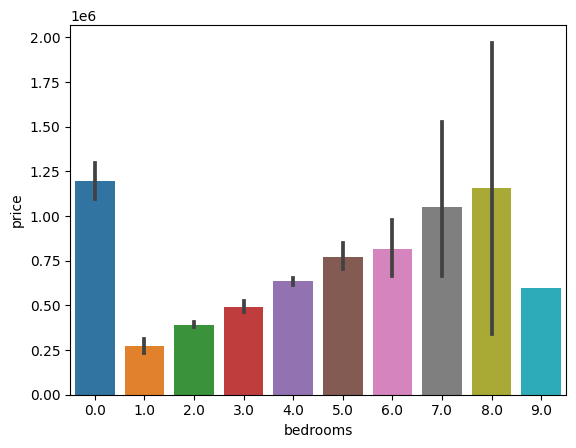

In [67]:
# Create a bar plot of number bedrooms and their price average
sns.barplot(data=data, x="bedrooms", y="price")
plt.show()

In [68]:
# Calculate median house prices by city
avg_city_prices = data.groupby("city")["price"].median()

print(avg_city_prices)

city
Algona                  230000.0
Auburn                  274000.0
Beaux Arts Village      745000.0
Bellevue                721500.0
Black Diamond           255000.0
Bothell                 458000.0
Burien                  277500.0
Carnation               432175.0
Clyde Hill             1300000.0
Covington               249500.0
Des Moines              256975.0
Duvall                  402750.0
Enumclaw                282000.0
Fall City               563500.0
Federal Way             264250.0
Inglewood-Finn Hill     425000.0
Issaquah                561000.0
Kenmore                 432045.0
Kent                    283200.0
Kirkland                522000.0
Lake Forest Park        450000.0
Maple Valley            320500.0
Medina                 2100000.0
Mercer Island           948750.0
Milton                  285000.0
Newcastle               602500.0
Normandy Park           447500.0
North Bend              394250.0
Pacific                 221200.0
Preston                 562450.0
Raven

In [69]:
# Filter the DataFrame for object columns
non_numeric = data.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in street column:  4525
Number of unique values in city column:  44
Number of unique values in statezip column:  77
Number of unique values in country column:  1


In [70]:
# Display descriptive statistics for house price
print(data['price'].describe())

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64


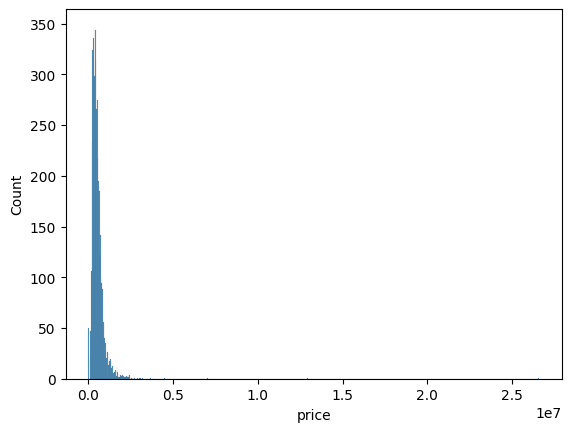

In [71]:
# Plot a histogram of house prices
sns.histplot(data=data,x="price")
plt.show()

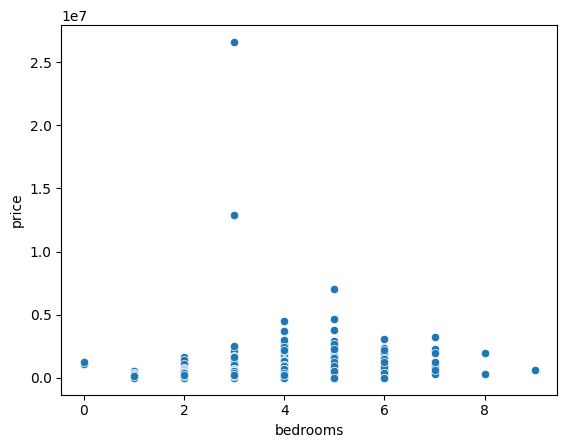

In [72]:
# Create the scatterplot
sns.scatterplot(data=data, x="bedrooms", y="price")
plt.show()

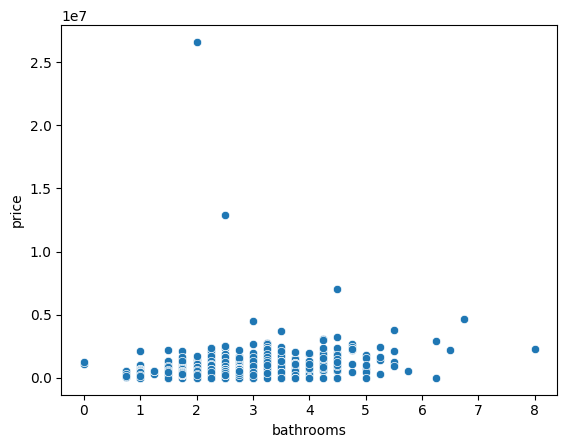

In [73]:
# Create the scatterplot
sns.scatterplot(data=data, x="bathrooms", y="price")
plt.show()

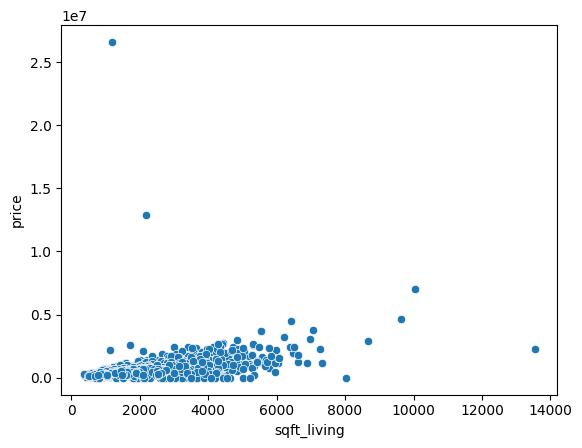

In [74]:
# Create the scatterplot
sns.scatterplot(data=data, x="sqft_living", y="price")
plt.show()

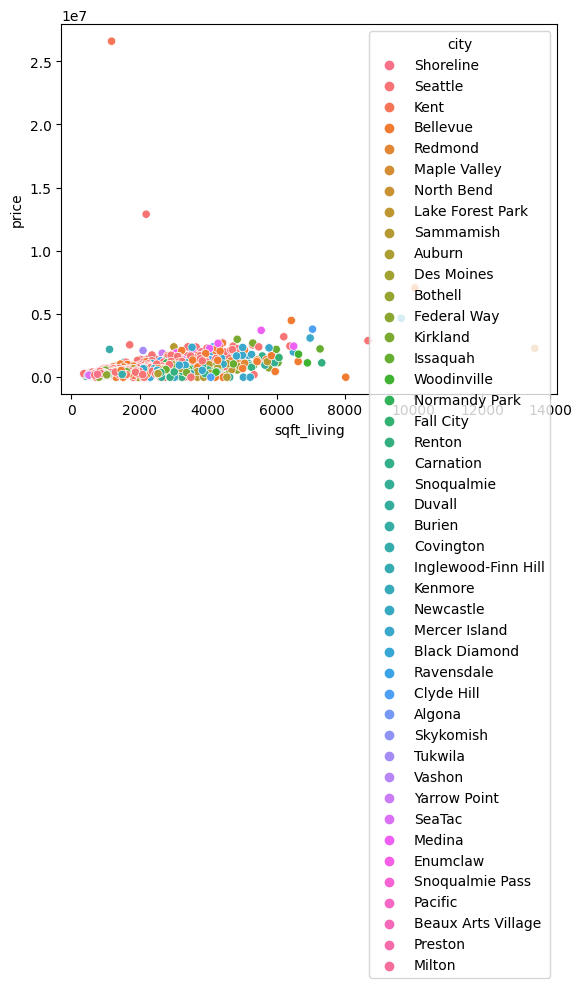

In [75]:
# Create the scatter plot
sns.scatterplot(data=data, x="sqft_living", y="price", hue="city")
plt.show()

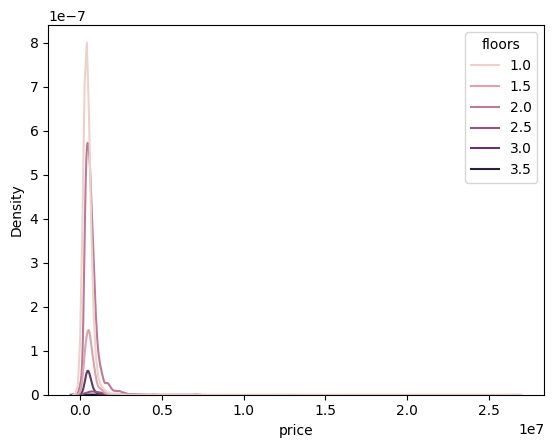

In [76]:
# Create the KDE plot
sns.kdeplot(data=data,x="price",hue="floors")
plt.show()

In [77]:
# Count the values associated with each bedrooms in data
print(data['city'].value_counts())

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

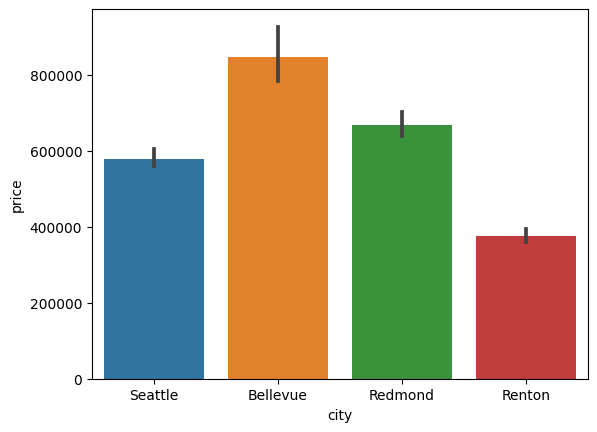

In [78]:
# Filter for houses in Seattle
Seattle_houses = data[data["city"].isin(["Seattle", "Renton", "Bellevue", "Redmond"])]

# Create a barplot of salaries by location
sns.barplot(data=Seattle_houses, x="city", y="price")
plt.show()